In [56]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_A78ghNi5QFY.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@SkillUp,The first 200 people to sign up to Brilliant w...,2021-11-11T12:34:08Z,23,229
1,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@ThroneOfBhaal,1 Year later it still has shit reviews and is ...,2023-05-30T00:17:22Z,0,0
2,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@adamfrazer5150,When is a Studio or brand no longer made from ...,2023-05-16T09:02:52Z,0,0
3,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@djtomoy,"Looks pretty basic, ok for the idiots, not for...",2023-05-14T09:51:08Z,0,0
4,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@tomgalesloot245,I would love your opinion on the game in its c...,2023-02-20T14:17:33Z,0,1
...,...,...,...,...,...,...,...,...
2908,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@JonneyRidden,Love you Shill <3,2021-11-11T12:37:40Z,1,14
2909,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@krakentrailers,Not first,2021-11-11T12:37:37Z,0,0
2910,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@mattmordey7602,uh oh,2021-11-11T12:37:37Z,0,1
2911,https://www.youtube.com/watch?v=A78ghNi5QFY,"So far, I do not recommend: Battlefield 2042 (...",2021-11-11T12:37:11Z,@belikeed1096,First,2021-11-11T12:37:30Z,0,6


In [58]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video','game','give',
    'fallout','lol','gon','ive','want','better','one','first',
    'would','see','played','lmao',"halo", "infinite", "ill", "fair", "battlefield", 
    "buying", "player", "shit", "new", "look", "good", "console", "bad",
    "sound", "back", "code", "wait", "another", "still", "year", "fps", "yeah", 
    "buy", "fun", "thing", "zone"
])
lmtzr = WordNetLemmatizer()

In [59]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [60]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
0,2021-11-11,The first 200 people to sign up to Brilliant w...,first 200 sign brilliant annual premium subscr...
98,2021-11-18,I enjoy the game and I’ll probably end up pick...,enjoy game end picking wish unlocks weapon end...
99,2021-11-18,I like it,
100,2021-11-18,"Whew, go battlefield. Destroying systems almos...",whew battlefield destroying system almost bad ...
101,2021-11-18,Seeing all these reviews has been painful. I r...,seeing review painful wanted game good straigh...
...,...,...,...
2908,2021-11-11,Love you Shill <3,love shill
2909,2021-11-11,Not first,first
2910,2021-11-11,uh oh,
2911,2021-11-11,First,first


In [61]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

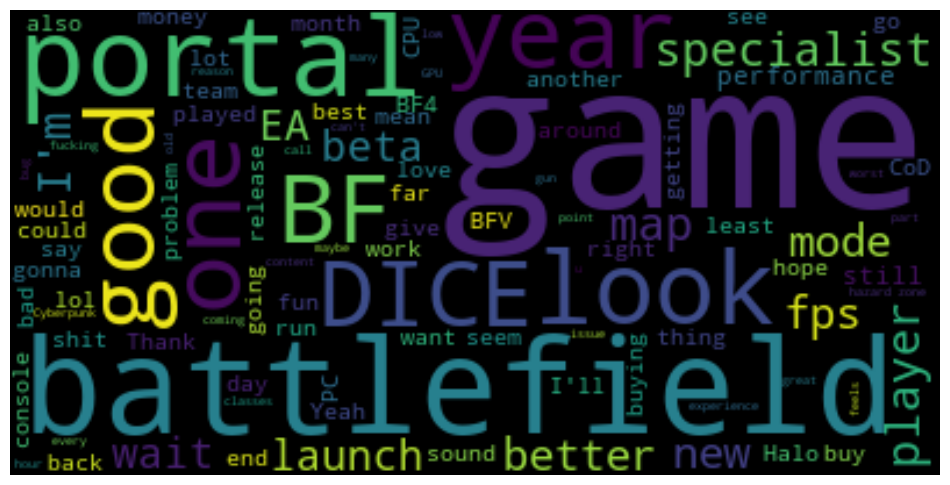

In [62]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2021-11-13,I'm surprised more people aren't talking about...,surprised arent talking terrible bullet spread...,negative
1,2021-11-14,"I think that today 2021, is not necessary that...",today 2021 necessary game launch super perfect...,negative
2,2021-11-17,Runs pretty on ps4,run pretty ps4,positive
3,2021-11-11,I hate to sound unfair but I don’t give games ...,hate sound unfair give game second chance goin...,negative
4,2021-11-16,"I miss just Assault, Support, Engineer, Recon",miss assault support engineer recon,negative
...,...,...,...,...
495,2021-11-11,looks very dull for such a high-end game. in f...,look dull highend game fact look battlefield part,negative
496,2021-11-13,You got a New subscriber. Thank you for your h...,new subscriber thank honesty tired scared offe...,negative
497,2021-11-13,No one seems to be mentioning that given the l...,one seems mentioning given loss performance mo...,negative
498,2021-11-12,the performance issues seem to be related to C...,performance issue seem related cpu game must p...,positive


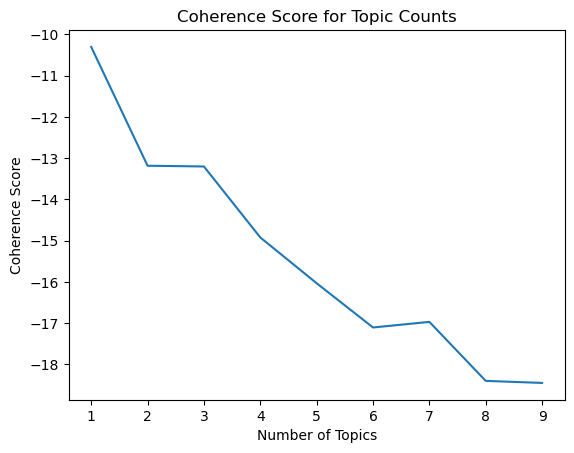

In [64]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [65]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.004*"knew" + 0.003*"cyberpunk" + 0.003*"skill" + 0.003*"fuck" + 0.003*"portal" + 0.003*"great" + 0.003*"man" + 0.002*"bought" + 0.002*"fucking" + 0.002*"map"'), (1, '0.006*"portal" + 0.003*"map" + 0.003*"launch" + 0.003*"doesnt" + 0.003*"run" + 0.003*"hazard" + 0.002*"broken" + 0.002*"hope" + 0.002*"least" + 0.002*"day"'), (2, '0.004*"cod" + 0.004*"unfinished" + 0.003*"suck" + 0.003*"anyone" + 0.003*"hour" + 0.003*"stick" + 0.003*"performance" + 0.003*"say" + 0.003*"dice" + 0.003*"guess"'), (3, '0.004*"bfv" + 0.003*"end" + 0.003*"specialist" + 0.003*"portal" + 0.003*"absolute" + 0.003*"company" + 0.002*"seems" + 0.002*"miss" + 0.002*"pa" + 0.002*"old"')]


1 topic has the highest coherence score, which suggests that this may be the optimal choice for maximizing coherence.
we also have one major topic in the biagrams, so 1 is fine.

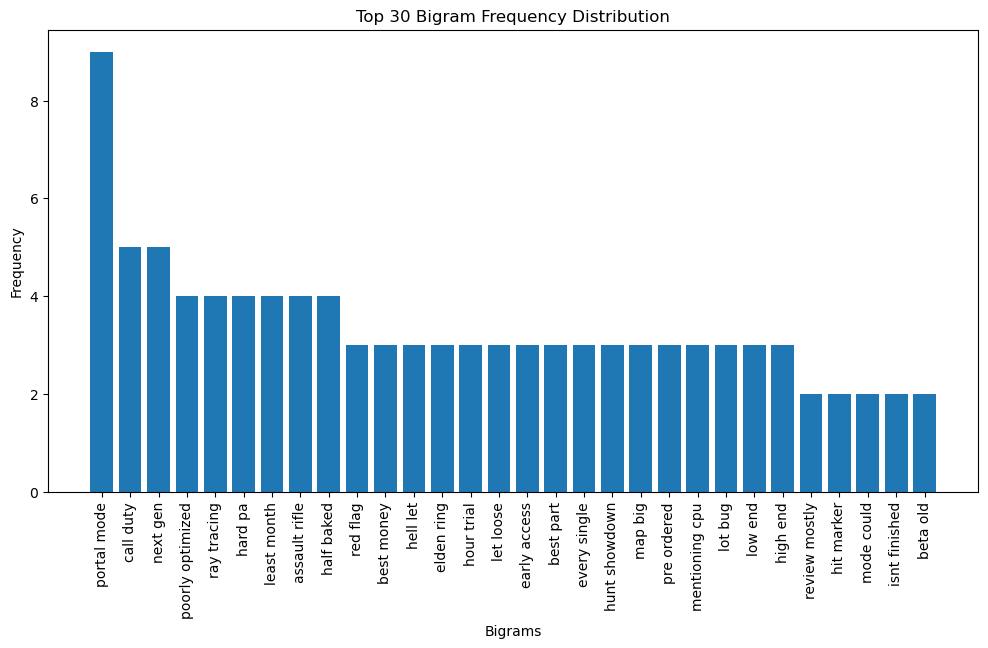

In [67]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [68]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
